# COGS 118A- Project Checkpoint

# Names

- Jerry Wang, A16149329
- Darius Azure, A15786330
- Miko Brown, A16237566


# Abstract 

The goal of our project is to classify song genre based on a variety of features describing the music. Our project tackles the problem of classifying song genre based on many variables including artist, song name, popularity, acousticness, danceability, energy, instrumentalness, key, tune, etc. 

The data contains entries with each of these features and their musical genre. We will create pipeline models to perform multi-classification on genre in the dataset. By comparing performance and metrics from different models, we will pick the highest accuracy algorithm by comparing the metrics from each one.

In this project, we will select model among(not limited to) KNN, SVM, Neural Networks, Decision Tree, Gradient Boosting, and Logistic Regression.

In this project, we will use $f_1$ score to determine which model has the best performance. We will investigate precision and recall individually as well, but $f_1$ score will be the determining metric.

# Background

In the history of music, there was no such complex system to define music genre in earlier times. It was more simple to categorize music according to its period of time<a name="wiki1"></a>[<sup>[1]</sup>](#wikinote1). After the 20th century, creative musicians brought different format of music to the stage so that people start to categorize the music into genres. The music genre becomes more complicated as the technology develops. Nowadays, when facing countless music work, we cannot categorize a genre from its time. Instead, we may need to determine the music category based on its features, attributes, and listening response. 

A music genre or subgenre may be defined by the musical techniques, the cultural context, and the content and spirit of the themes<a name="wiki2"></a>[<sup>[2]</sup>](#wikinote2). This article describes how many people subjectively view genre of music. This is useful for human-being, but difficult to classify large datasets of songs without listening to and understanding each song in depth. We can find that music genre itself is not easy to identified by individual factors from listening since people may have subjective thoughts. We tend to believe that there exists some more objective methods in machine learning to categorize music genre with computer algorithms.

Additionally, music genre is a dynamic concept. Due to the natural evolution of music, it may appear differently in differnt periods of time. Therefore, a listening response might be outdated if a genre is gradually disappearing or shifting to different formats<a name="newyorker"></a>[<sup>[3]</sup>](#newyorkernote). In contradiction, data implementation will not be affected by such evolution since data is measure objectively during that time period and measures a fixed in-time genre rather than a dynamic genre shifted from earlier times. For instance, the general keys of Jazz music in 1900s are different with Jazz music in 2020, but the computer will filter out the era's influence on keys.

# Problem Statement
Given different attributes of one song, what is its genre?

The problem is quantifiable, we can represent the problem as:

- Denote song entries $x_1$ to $x_n$ as X
- Denote song genre $y_1$ to $y_n$ as y
- Given $x_1$ to $x_n$, each $\vec x_i$ $\in \mathbb{R}^d$ with features $f_1$ through $f_d$. What is $\bar y_i$?

ML-relevant potential solution: Give $x_1$ to $x_n$, by applying either KNN/SVM/DecisionTree/LogisticRegression, the model produces the prediction of its most likely class $y_i$.

The problem is measurable since we can evaluate the quantitative prediction performance with precision, recall, and f1 score.

The problem is replicable since our selected algorithms are generally deterministic, once the data of a song is obtained, the problem can be reproduced by applying the same algorithms.

# Data

- source: interest in music, general search online for datasets; [author](https://www.kaggle.com/vicsuperman) is from Wellington, New Zealand; the origin source of the data is unknown, we only grab it from Kaggle platform

- reference: [Kaggle](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre), dataset search under classification

- description dataset: 17 of variables, 49944 of observations

- an observation consists of: instance_id, artist_name, track_name, popularity, acousticness, danceability,  duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, obtained_date, valence, music_gengre

- Actually we are not sure what should be considered as critical variables since any of the attributes of a song can make huge differernce to the song. Generally, the variables are presented in numerical values and categorical values and contains missing data.

- cleaning of extreme numerical values, unmatched type, different format of categorical values

- data missingness: if the data contains missing value, we need to first examine its type: Missing Completely At Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR). Then, we need to apply the strategy from one of the following: 1. ignore missingness 2. fill with special value 3.fill with mean/median 4.fill with nearest data 5.fill with our model prediction. This decision will be further determined in the data part if we encounter data missing.


package import and data load

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn
import warnings
# from sklearn import
# import tensorflow
# from tensorflow import keras
# import ...

In [2]:
#read data in dataframe
df = pd.read_csv("music.csv", header=0)
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
#check shape of dataframe
df.shape

(50005, 18)

check missingness

In [4]:
#check for missing data
if df.isnull().values.any():
    warnings.warn("missing data")

#print number of missing entries
print(df.isnull().sum().sum())

90


C:\Users\mikob\AppData\Local\Temp\ipykernel_18348\566493410.py:3: UserWarning: missing data
  warnings.warn("missing data")


In [5]:
#drop missing data
df = df.dropna()
# drop obtained_date: the date when this music piece is collected, irrelavant in this data
df = df.drop(columns=['obtained_date'])

map into correct types

In [6]:
# convert id from float to int first
# df['instance_id'] = df['instance_id'].map(float)
# cols = df.columns
# correct_types = [str, str, str, float, float, float, float, float, float, str, float, float, str, float, str, float, str]
# cols_dict = dict(zip(cols, correct_types))
# for col in cols_dict:
#     df[col] = df[col].map(cols_dict[col], na_action='ignore')

In [7]:
#drop rows that have tempo equal to ?
df = df[df["tempo"] != "?"]
df.shape

(45020, 17)

In [8]:
#drop non-numeric columns for basic baseline logistic regression model
df = df.drop(columns=['instance_id', 'artist_name', 'track_name', 'key', 'mode'])
cols = df.columns
correct_types = [float, float, float, float, float, float, float, float, float, float, float, str]
cols_dict = dict(zip(cols, correct_types))
for col in cols_dict:
    df[col] = df[col].map(cols_dict[col], na_action='ignore')
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic


In [9]:
#check no missing data
if df.isnull().values.any():
    warnings.warn("missing data")
df.isnull().sum().sum()

0

In [10]:
#new shape of well-formed data
df.shape

(45020, 12)

Quantitaive feature: popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, mode, speechiness, tempo, valence

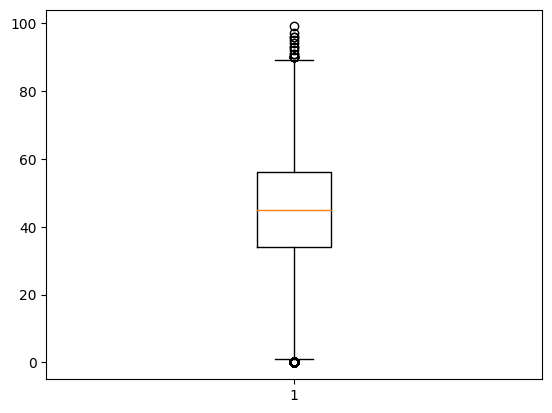

In [11]:
#box plot of popularity
plt.boxplot(df['popularity'])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
#extract X and y from dataset to create train test split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#check shape of train and test split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30163, 11)
(14857, 11)
(30163,)
(14857,)


In [13]:
from sklearn.linear_model import LogisticRegression

#train baseline logistic regression model
clf = LogisticRegression(C=1, random_state=0, penalty='l2', multi_class='multinomial', max_iter=1000).fit(X_train, y_train)


In [14]:
#Evaluate performance on test set
predicted = clf.predict(X_test)

#get f1 score for baseline model
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted, average="micro"))

0.29588746045635056


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Why might your solution work? Make sure to describe how the solution will be tested.

Given $x_1$ to $x_n$, each $\vec x_i$ $\in \mathbb{R}^d$ with features $f_1$ through $f_d$. Predict 
the most likely class $y_i$.

The solution is applicable and appropriate since:
- Given features and observations, a multi-class classification is appropriate for this dataset since our true music genre has different categorical values.
- We will build different models to produce the prediction, for example(not limited to) KNN, SVM, Neural Networks, Decision Trees, Gradient Boosting... The performance will be evaluated quantitatively.
- We will use (repeated) K-fold cross validation to split test data and test our model performace with accuracy.
- Comparision through models will be performed.

Model selection:
- We selected these models based on our multi-class classification(not limited to): KNN, SVM, Neural Networks, Decision Trees, Gradient Boosting, LogisticRegression
- We will use LogisticRegression as a baseline model because it's predictive power is relatively low but it is easier to understand
- KNN is always a solid choice since we can take the data and pick its genre by selecting the majority of its nearest neighbors. For a multi-label task, KNN is a straightforward and easy model to implement. The only concern is the running load and time.
- SVM is workable since a multi-class task can be reduced to a "rough" binary by using one-vs-rest or one-vs-one, so applying SVM in each binary case will help us to distinguish two genres easier.
- We haven't come to neural networks yet, but we had a basic understanding that neural networks perform similar as decision tree, which might be a robust model for multi-label tasks. We will try to have an implementation and perform a comparision with other methods.
- Decision trees are easy to understand and interpret. This will make our algorithm easier to visualize to give context to how it makes it's decision.
<!-- 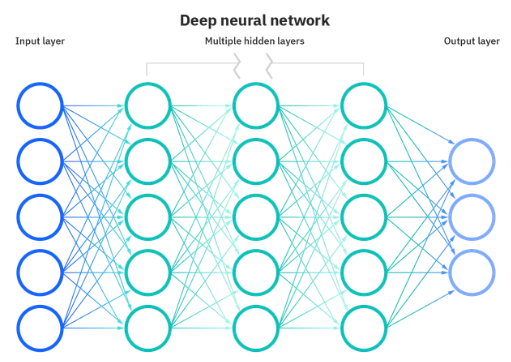 -->

# Evaluation Metrics

For our project we have chosen to focus on the evaluation metrics of precision, recall, and f1 score which we will use to try to evaluate how well our project is predicting the music genre. Due to having to store our data in a measurable way through our data cleaning to be quantifiable we need to see if we are handling these new variables are correctly being measured in a way where important comparisons have the proper weights. Since we need the project to be measurable we need to see that these variables that we cleaned are being weighed correctly which is why we will use f1 to try to compare our prediction of our training set to the actual genre to try to measure how many true postives and true negatives we have in our predictions in order to see how accurate our predictions are. We will use precision to determine how good we are at classifying a sample positively (quality of positive predictions). We will use recall to determine how good we are at detecting positive samples.

We can also compare these scores to try to see if there is any overlap between predicting certain genres and see if our different models have more power in predicting these songs better than others depending on our score that we get. In general using these different factors that we have deemed quantifable we should check if we correctly measured the weight of these factors and see how truly we were able to identify the genre. 

# Ethics & Privacy

Due to the fact that each song labeled with artist and the name of the song there is the problem of these being identifable and since this data is likely not important to our analysis we will not reflect specific songs in our analysis and try to avoid biases due to song selections in our fold selection to the best of our ability. We will have our data highlight only the important aspects of the analysis that will not have identifiable links back to the data. We will have the songs instead represented as meaningless id code labels that will have no relation to the song or artist themselves to avoid potential bias in our data analysis and will instead focus on the other factors about the songs to focus instead on predicting the genre based on those quantifiable aspects rather than inherit biases we may unintentionally have if we based it on song or artist names. Due to the nature of us scrapping data that we ourselves did not collect we will comb through the data to make sure that there are no ethical issues with the data collection and that there is no bias to what was collected and that there is no PIID values that may have been collected in the data as discussed earlier. We will make sure that all genres are properly represented in valid ways and that our data analysis relys on purely numerical data that is comparable rather than our own bias. Furthermore if any ethical dilemas come up during or after our research we plan on adjusting our data to handle or remove ethical concerns within our modeling and deployment of the analysis. We will have our data in comparable and categorical matter where we weigh our data properly but if these factors are found to not be properly utilized or have a bias that affects our ethics we will try to reflect this in our final project.

# Team Expectations 

* Be nice and supportive.
* Communicate through Discord, respond in time.
* Reach agreement to changes.
* Ask for help if necessary, help if you can.
* Vote for conflicts.
* Don't delete anything without permission except individual scratch.
* Finish as our schedule.

# Project Timeline

Rough time plan:

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/17  |  2 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss final project topic; Discuss hypothesis; Dackground research; Build proposal | 
| 2/22  | 2 PM  | Edit, finalize, and submit proposal; Search for datasets   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/28  |  2 PM |  Start data import | Discuss ideal dataset(s) and ethics; Load data; Find relevant music knowledge; Solve potential concerns | 
| Below TBD |  2 PM |  ...  | ... | 
| 3/7  | 2 PM  | Import & Wrangle Data ,do some EDA  | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/14  | 2 PM  | Finalize wrangling/EDA; Begin programming for project  | Discuss/edit project code; Complete project |
| 3/20 | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="wikinote1"></a>1.[^](#wiki1): (16 February 2023) History of Music Wikipedia. https://en.wikipedia.org/wiki/History_of_music<br>
<a name="wikinote2"></a>2.[^](#wiki2): (9 February 2023) Music genre Wikipedia https://en.wikipedia.org/wiki/Music_genre#:~:text=A%20music%20genre%20or%20subgenre,a%20wide%20variety%20of%20subgenres<br>
<a name="newyorkernote"></a>3.[^](#newyorker): (15 March 2021) Genre Is Disappearing. What Comes Next? https://www.newyorker.com/magazine/2021/03/15/genre-is-disappearing-what-comes-next